In [2]:
import yellowcab
import pandas as pd
import folium
import matplotlib.pyplot as plt
import geopandas as gpd
import json
import os

import requests
from xml.etree import ElementTree
import numpy as np
import shapely

# import contextily as ctx

The path to some files might need to be changed, since the notebook was moved.

In [4]:
taxi_zones_geojson = gpd.read_file("../../data/input/taxi_zones/NYC Taxi Zones.geojson")

In [5]:
taxi_zones_geojson.to_crs(3857)

,shape_area,objectid,shape_leng,location_id,zone,borough,geometry
0,0.0007823067885,1,0.116357453189,1,Newark Airport,EWR,"MULTIPOLYGON (((-8258175.533 4967457.203, -825..."
1,0.00486634037837,2,0.43346966679,2,Jamaica Bay,Queens,"MULTIPOLYGON (((-8217980.622 4959237.286, -821..."
2,0.000314414156821,3,0.0843411059012,3,Allerton/Pelham Gardens,Bronx,"MULTIPOLYGON (((-8220713.534 4993383.154, -822..."
3,0.000111871946192,4,0.0435665270921,4,Alphabet City,Manhattan,"MULTIPOLYGON (((-8234500.227 4971984.094, -823..."
4,0.000497957489363,5,0.0921464898574,5,Arden Heights,Staten Island,"MULTIPOLYGON (((-8257036.109 4948033.095, -825..."
...,...,...,...,...,...,...,...
258,0.000168611097013,256,0.0679149669603,256,Williamsburg (South Side),Brooklyn,"MULTIPOLYGON (((-8233004.980 4970145.936, -823..."
259,0.000394552487366,259,0.126750305191,259,Woodlawn/Wakefield,Bronx,"MULTIPOLYGON (((-8221063.636 4999130.459, -822..."
260,0.000422345326907,260,0.133514154636,260,Woodside,Queens,"MULTIPOLYGON (((-8226705.594 4977119.879, -822..."
261,0.0000343423231652,261,0.0271204563616,261,World Trade Center,Manhattan,"MULTIPOLYGON (((-8239125.774 4968930.646, -823..."


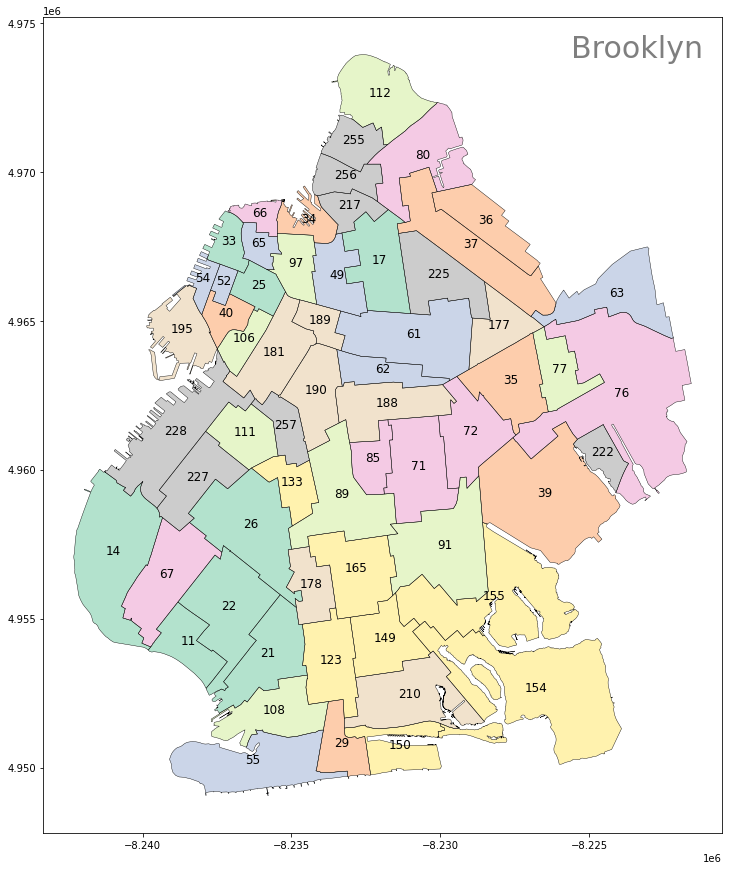

In [4]:
map_fig = yellowcab.model.create_map(taxi_zones_geojson, "Brooklyn")

In [ ]:
tiles='https://cartodb-basemaps-{s}.global.ssl.fastly.net/light_all/{z}/{x}/{y}.png'
attr="Map tiles by Carto, under CC BY 3.0. Data by OpenStreetMap, under ODbL."
m = folium.Map(location = [40.650002, -73.949997], zoom_start=12, attr=attr, tiles=tiles)
m

In [ ]:
taxi_zones_csv = pd.read_csv("../../data/input/taxi_zones/taxi_zones.csv")
taxi_zones_geojson = pd.read_json("../../data/input/taxi_zones/taxi_zones.geojson")

In [ ]:
taxi_zones_geojson["features"][2]

In [ ]:
loc_ids = taxi_zones_csv.loc[taxi_zones_csv['Borough'] == "Brooklyn"]["LocationID"]
loc_ids

In [ ]:
taxi_zones_geojson["features"][2]["properties"]["borough"]

In [ ]:
folium.Marker([40.650002, -73.949997]).add_to(m)
m

In [ ]:
folium.GeoJson(taxi_zones_geojson, name="geojson").add_to(m)

In [ ]:
gdf = gpd.GeoDataFrame.from_features((taxi_zones_geojson))
gdf = gdf[gdf['borough']=='Brooklyn']
gdf = gdf[['location_id','zone','geometry']]
gdf = gdf.rename(columns={'location_id':'LocationID'})
gdf['LocationID'] = pd.to_numeric(gdf['LocationID'])

output_data

In [ ]:
data = taxi_zones_geojson.reset_index()
gpd.GeoDataFrame.from_features((data))

In [ ]:
taxi_zones_csv

In [ ]:
gdf = gpd.read_file("../../data/input/taxi_zones/taxi_zones.geojson")
gdf_edit = gpd.read_file("../../data/input/taxi_zones/NYC Taxi Zones.geojson")
gdf_edit = gdf_edit[gdf_edit['borough']=='Brooklyn']

gdf_edit_all = gpd.read_file("../../data/input/taxi_zones/NYC Taxi Zones.geojson")

gdf = gdf[gdf['borough']=='Brooklyn']
gdf_edit

In [ ]:
gdf_edit["geometry"][15]

In [ ]:
gdf["geometry"][10]

In [ ]:
gdf

In [ ]:
gdf = gdf[gdf['borough']=='Brooklyn']
gdf = gdf[['LocationID','zone','geometry']]
gdf['LocationID'] = pd.to_numeric(gdf['LocationID'])

In [ ]:
gdf["area"] = gdf.area
gdf['boundary'] = gdf.boundary
gdf['centroid'] = gdf.centroid

In [ ]:
gdf_edit["area"] = gdf_edit.area
gdf_edit['boundary'] = gdf_edit.boundary
gdf_edit['centroid'] = gdf_edit.centroid

In [ ]:
gdf['boundary']

In [ ]:
gdf_edit.plot("area")

In [ ]:
gdf_edit["geometry"].plot()

In [ ]:
gdf_edit["centroid"].plot()

In [ ]:
ax = gdf_edit["geometry"].plot(color="white", edgecolor='black', figsize=(15, 15))
gdf_edit["centroid"].plot(ax=ax, color="black", figsize=(15, 15))

In [ ]:
gdf_edit['coords'] = gdf_edit['geometry'].apply(lambda x: gdf_edit['location_id'].representative_point().coords[:])
gdf_edit['coords'] = [coords[0] for coords in gdf_edit['coords']]

In [ ]:
gdf_edit.apply(lambda x: ax.annotate(s=gdf_edit["location_id"], xy=gdf_edit.geometry.centroid.coords[0], ha='center'),axis=1);

In [ ]:
gdf_edit.crs

In [ ]:
gdf_edit_crs = gdf_edit.to_crs("EPSG:3395")
gdf_edit_crs

In [ ]:
gdf_edit_crs.plot(figsize=(12,12))

In [ ]:
gdf_edit[gdf_edit['zone'] == 'Bath Beach'].plot(figsize=(12, 12))

In [ ]:
fig = plt.figure(1, figsize=(15, 15)) 
ax = fig.add_subplot()
gdf_edit.apply(lambda x: ax.annotate(text="L.-ID:"+x["location_id"]+"\n"+x["zone"], xy=x.geometry.centroid.coords[0], ha='center', fontsize=8),axis=1);
gdf_edit.boundary.plot(ax=ax, color='Black', linewidth=.4)
gdf_edit.plot(ax=ax, cmap='Pastel2', figsize=(12, 12))
ax.text(0.875, 0.98, 'Brooklyn', transform=ax.transAxes,
        fontsize=30, color='black', alpha=0.5,
        ha='center', va='top', rotation='0')

In [ ]:
fig = plt.figure(1, figsize=(15, 15)) 
ax = fig.add_subplot()
gdf_edit.apply(lambda x: ax.annotate(text=x["location_id"], xy=x.geometry.centroid.coords[0], ha='center', fontsize=12),axis=1);
gdf_edit.boundary.plot(ax=ax, color='Black', linewidth=.4)
gdf_edit.plot(ax=ax, cmap='Pastel2', figsize=(12, 12))
ax.text(0.875, 0.98, 'Brooklyn', transform=ax.transAxes,
        fontsize=30, color='black', alpha=0.5,
        ha='center', va='top', rotation='0')

In [ ]:
fig = plt.figure(1, figsize=(15, 15)) 
ax = fig.add_subplot()
gdf_edit.apply(lambda x: ax.annotate(text=x["location_id"], xy=x.geometry.centroid.coords[0], ha='center', fontsize=12),axis=1);
gdf_edit.boundary.plot(ax=ax, color='Black', linewidth=.4)
gdf_edit_all.plot(ax=ax, cmap='Pastel2')
ax.text(0.875, 0.98, 'Brooklyn', transform=ax.transAxes,
        fontsize=30, color='black', alpha=0.5,
        ha='center', va='top', rotation='0')

In [ ]:
# converting to google maps format
gdf_edit_mercator = gdf_edit.to_crs(3875)

fig = plt.figure(1, figsize=(15, 15))

ax = fig.add_subplot()
ctx.add_basemap(ax)

gdf_edit.apply(lambda x: ax.annotate(text=x["location_id"], xy=x.geometry.centroid.coords[0], ha='center', fontsize=12),axis=1);
gdf_edit.boundary.plot(ax=ax, color='Black', linewidth=.4)
gdf_edit.plot(ax=ax, cmap='Pastel2', figsize=(12, 12))
ax.text(0.875, 0.98, 'Brooklyn', transform=ax.transAxes,
        fontsize=30, color='black', alpha=0.5,
        ha='center', va='top', rotation='0')

In [ ]:
gdf_edit_mercator = gdf_edit.to_crs(3875)
ctx.add_basemap(ax)
ax.plot()

In [ ]:
url = "http://maps.googleapis.com/maps/api/staticmap?center=-30.027489,-51.229248&size=800x800&zoom=14&sensor=false"
im = Image.open(cStringIO.StringIO(urllib.urlopen(url).read()))
plt.imshow(im)
plt.show()

In [ ]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt

nyc_boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
nyc_collision_factors = gpd.read_file(gplt.datasets.get_path('nyc_collision_factors'))


proj = gcrs.AlbersEqualArea(central_latitude=40.7128, central_longitude=-74.0059)
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(121, projection=proj)
ax2 = plt.subplot(122, projection=proj)

gplt.kdeplot(
    nyc_collision_factors[
        nyc_collision_factors['CONTRIBUTING FACTOR VEHICLE 1'] == "Failure to Yield Right-of-Way"
    ],
    cmap='Reds',
    projection=proj,
    shade=True, shade_lowest=False,
    clip=nyc_boroughs.geometry,
    ax=ax1
)
gplt.polyplot(nyc_boroughs, zorder=1, ax=ax1)
ax1.set_title("Failure to Yield Right-of-Way Crashes, 2016")

gplt.kdeplot(
    nyc_collision_factors[
        nyc_collision_factors['CONTRIBUTING FACTOR VEHICLE 1'] == "Lost Consciousness"
    ],
    cmap = 'Reds',
    projection=proj,
    shade=True, shade_lowest=False,
    clip=nyc_boroughs.geometry,
    ax=ax2
)
gplt.polyplot(nyc_boroughs, zorder=1, ax=ax2)
ax2.set_title("Loss of Consciousness Crashes, 2016")

plt.savefig("nyc-collision-factors.png", bbox_inches='tight', pad_inches=0.1)

In [ ]:
gdf_edit

In [ ]:
taxi_zones_csv

In [ ]:
gdf

In [ ]:
tiles='https://cartodb-basemaps-{s}.global.ssl.fastly.net/light_all/{z}/{x}/{y}.png'
attr="Map tiles by Carto, under CC BY 3.0. Data by OpenStreetMap, under ODbL."

m = folium.Map(location = [-74, 40], zoom_start=5.5, tiles=tiles, attr=attr)

folium.Choropleth(
    geo_data=f"../../data/input/taxi_zones/NYC Taxi Zones.geojson",  # geojson file with spatial/geographical information
    data = taxi_zones_csv,
    columns = ["LocationID"],
    key_on="properties.geometry.location_id", # connect dataframe and geojson information
    fill_color='PuBuGn', # Find more here: https://github.com/dsc/colorbrewer-python
    fill_opacity = 0.5,
    line_opacity = 0.2).add_to(m)

m

In [ ]:
gdf = gpd.read_file("../../data/input/taxi_zones/taxi_zones.geojson")
gdf_edit = gpd.read_file("../../data/input/taxi_zones/NYC Taxi Zones.geojson")
gdf_edit = gdf_edit[gdf_edit['borough']=='Brooklyn']

gdf_edit_all = gpd.read_file("../../data/input/taxi_zones/NYC Taxi Zones.geojson")

gdf = gdf[gdf['borough']=='Brooklyn']
gdf_edit

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import os

def get_data_path():
    if os.path.isdir(os.path.join(os.getcwd(), 'data')):
        return os.path.join(os.getcwd(), 'data')
    elif os.path.isdir(os.path.join(os.getcwd(), "..", "data")):
        return os.path.join(os.getcwd(), "..", "data")
    else:
        raise FileNotFoundError

In [ ]:
taxi_zones_geojson = gpd.read_file("../../data/input/taxi_zones/NYC Taxi Zones.geojson")

In [ ]:
def create_map(gdf, filter_borough):
    #filter
    gdf_filtered = gdf.to_crs(3857)[gdf['borough'] == filter_borough]

    # Set boundaries etc.
    gdf_filtered["area"] = gdf_filtered.area
    gdf_filtered['boundary'] = gdf_filtered.boundary
    gdf_filtered['centroid'] = gdf_filtered.centroid

    # Create plot
    fig = plt.figure(1, figsize=(15, 15))
    ax = fig.add_subplot()
    gdf_filtered.apply(
        lambda x: ax.annotate(text=x["location_id"], xy=x.geometry.centroid.coords[0], ha='center', fontsize=12),
        axis=1)
    gdf_filtered.boundary.plot(ax=ax, color='Black', linewidth=.4)
    gdf_filtered.plot(ax=ax, cmap='Pastel2', figsize=(12, 12))
    ax.text(
        0.875, 0.98, 'Brooklyn', transform=ax.transAxes,
        fontsize=30, color='black', alpha=0.5,
        ha='center', va='top', rotation='0'
    )
    
    yellowcab.io.save_fig(fig, "map")
    
    return fig, gdf_filtered

In [ ]:
map_fig = yellowcab.map.create_map(taxi_zones_geojson, "Brooklyn")

In [ ]:
gdf = gpd.read_file("../../data/input/taxi_zones/taxi_zones.geojson")
gdf_edit = gpd.read_file("../../data/input/taxi_zones/NYC Taxi Zones.geojson")
gdf_edit = gdf_edit[gdf_edit['borough']=='Brooklyn']

gdf_edit_all = gpd.read_file("../../data/input/taxi_zones/NYC Taxi Zones.geojson")

gdf = gdf[gdf['borough']=='Brooklyn']
gdf_edit